In [1]:
root_path = '/home/drl/PycharmProjects/rl_baselines/pytorch-a2c-ppo-acktr'
import os 
os.chdir(root_path)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from utils import IO
from utils.Logger import LoggerCsv
from eval.plot_results import *

 v_e = eval_data_df.loc[:, '1':'6'].values

c_command = eval_data_df.loc[:, '7':'9'].values

xyz = eval_data_df.loc[:, '10':'12'].values

In [2]:
#GA_data_path = 'eval/results_any/F1_straight_line_ga_rl/originals/GA_straight_line'

exp_id = 48
num_data = 1

RL_data_path = 'eval/results_any/F2_vel_x/originals'
#RL_data_path = 'eval/results_any/F2_vel_x/PID_originals'
 
save_fig_path = 'eval/results_any/F2_vel_x'


folder_name = 'No'+str(exp_id)
exp_data_path = os.path.join(RL_data_path,  folder_name)
exp_dir_list = os.listdir(exp_data_path)
exp_dir_list

['log_data_0.csv']

In [3]:
GA_data_df = []
RL_data_df =[]
for i in range(num_data):
    rl_data_df = pd.read_csv(os.path.join(exp_data_path,exp_dir_list[i].format(i)))
    RL_data_df.append(rl_data_df)

max_step = 2000
dt = 0.01

#TODO
exp_i = 0

xyz = RL_data_df[exp_i].loc[:, '10':'12'].values
v_e = RL_data_df[exp_i].loc[:, '1':'6'].values
c_command = RL_data_df[exp_i].loc[:, '7':'9'].values

t = np.arange(0, max_step * dt, dt)

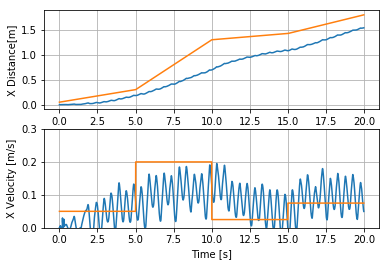

In [4]:
GA_data_df = []
RL_data_df =[]
for i in range(num_data):
    rl_data_df = pd.read_csv(os.path.join(exp_data_path,exp_dir_list[i].format(i)))
    RL_data_df.append(rl_data_df)

max_step = 2000
dt = 0.01

#TODO
exp_i = 0

xyz = RL_data_df[exp_i].loc[:, '10':'12'].values
v_e = RL_data_df[exp_i].loc[:, '1':'6'].values
c_command = RL_data_df[exp_i].loc[:, '7':'9'].values

t = np.arange(0, max_step * dt, dt)
 
pos_f =[]
for i in range(max_step):
    if i == 0:
        pos = c_command[i, 0]
    else:
        pos += c_command[i, 0] *dt
    pos_f.append(pos)
pos_f = np.array(pos_f)

pos = xyz[:max_step, 0]
vel = v_e[:max_step, 0]
vel_f = c_command[:max_step, 0]


fig, axs = plt.subplots(2, 1)
axs[0].plot(t, pos)
axs[0].plot(t, pos_f)
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('X Distance[m]')
axs[0].grid(True)


axs[1].plot(t, vel,  label = 'v')
axs[1].plot(t, vel_f,  label = 'ref')
axs[1].set_ylim(0,0.3)
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('X Velocity [m/s]')
axs[1].grid(True)



#fig.tight_layout()

#plt.savefig(os.path.join(save_fig_path, 'EXP{}-No{}_f2{}.jpg'.format(exp_id, exp_i, exp_dir_list[exp_i])))
data = [ pos_f,pos , vel, vel_f]
#IO(save_fig_path+'/EXP{}-No{}_f2{}.pkl'.format(exp_id, exp_i, exp_dir_list[exp_i])).to_pickle(data)
plt.show()

## Summary

In [5]:
result_filtered = IO(save_fig_path+'/EXP23-No0_f2log_data_s18g1.csv.pkl').read_pickle()
result_original = IO(save_fig_path+'/EXP25-No0_f2log_data_s18g1.csv.pkl').read_pickle()
result_pid = IO(save_fig_path+'/EXP25-No0_f2log_data_pid_s1_18.csv.pkl').read_pickle() 

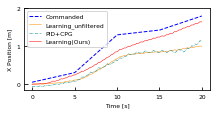

In [21]:

pos1 = result_filtered[1]
pos2 = result_original[1]
pos3 = result_pid[1]

vel1 = result_filtered[2]
vel2 = result_original[2]
vel3 = result_pid[2]


pos_f = result_filtered[0]
vel_f = result_filtered[3]

plt.rcParams['xtick.direction'] = 'in' 
plt.rcParams['ytick.direction'] = 'in' 
fig, ax = plt.subplots(figsize = (12,4))   

plt.plot(t, pos_f, '--', color='blue', label = 'Commanded' , linewidth= 1)
plt.plot(t, pos2 , color= 'darkorange',   label = 'Learning_unfiltered', linewidth= 0.5)
plt.plot(t, pos3, '-.', color = 'darkcyan',     label = 'PID+CPG', linewidth= 0.5)
plt.plot(t, pos1 , 'r',  label = 'Learning(Ours)', linewidth= 0.5)

# 字体设置
font1 = {'family' : 'DejaVu Sans',
'weight' : 'normal',
'size'   : 6,
}
 
# lavel 设置
plt.xlabel('Time [s]', font1)
plt.ylabel('X Position [m]', font1)

# # legend 设置
# plt.legend(loc=0, numpoints=1)
# leg = plt.gca().get_legend()
# ltext = leg.get_texts()
# plt.setp(ltext, fontsize=2)
plt.legend(loc=0, prop={'size': 6})
 


# 坐标轴设置
plt.xticks(np.arange(0 ,22, 5)) 
plt.yticks([0.0,1.0,2.0]) 
plt.tick_params(labelsize=6)
 

fig.set_size_inches(8.5/2.54   ,8.5/2.54*(1/2))
fig.subplots_adjust(bottom=0.2)
#plt.savefig(save_fig_path+'/compare_tracking_pos.eps')
plt.savefig(save_fig_path+'/compare_tracking_pos_filter.svg', dpi=600,  pad_inches=0 )
plt.show()


In [35]:
def print_rmsmax(x,x_f):
    rms =  np.sqrt((x - x_f) **2).mean()
    max = np.sqrt((x - x_f) **2).max()
    print('rms=',rms)
    print('max=',max )
    return rms, max
    
print('our leaning:')
rms1, max1= print_rmsmax(pos1, pos_f)
print('pid leaning:')
rms2, max2=print_rmsmax(pos3, pos_f)    

print('our_unfiltered leaning:')
rms3, max3=print_rmsmax(pos2, vel_f)   

print('compare 1 with 2:')
print('rms2/rms1 = ', rms2/rms1)
print('max1/max2 = ', max1/max2)

our leaning:
rms= 0.2043811340583756
max= 0.44587634925953923
pid leaning:
rms= 0.4701855130605934
max= 0.7904217444290499
our_unfiltered leaning:
rms= 0.45767451602731263
max= 0.9347620921312136
compare 1 with 2:
rms2/rms1 =  2.3005328511696117
max1/max2 =  0.5640992956002391


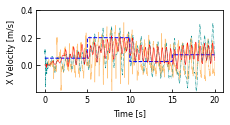

In [22]:
fig, ax = plt.subplots(figsize=(12,4))
# plt.plot(t, vel_f, 'b--')
# plt.plot(t, vel1,   'r')
# #plt.plot(t, vel2,  'g--')
# plt.plot(t, vel3, 'g--')

plt.plot(t, vel2 , color= 'darkorange',   label = 'Learning_unfiltered', linewidth=0.5, alpha= 0.5)



plt.plot(t, vel3, '-.', color = 'darkcyan',     label = 'PID+CPG', linewidth=0.5)
plt.plot(t, vel_f, '--', color='blue', label = 'Commanded' , linewidth=1)
plt.plot(t, vel1 , 'r',  label = 'Learning(Ours)', linewidth=0.5)


font1 = {'family' : 'DejaVu Sans',
'weight' : 'normal',
'size'   : 8,
}
 
plt.xlabel('Time [s]', font1)
plt.ylabel('X Velocity [m/s]', font1)
plt.ylim([-0.2,0.40])

 
#plt.legend(loc='upper left', prop={'size': 6})

plt.xticks(np.arange(0 ,22, 5)) 
plt.yticks([0.0,0.2,0.4]) 
plt.tick_params(labelsize=8)
 
 
 

fig.set_size_inches(8.5/2.54   ,8.5/2.54*(1/2))
fig.subplots_adjust(bottom=0.2)
 
plt.savefig(save_fig_path+'/compare_tracking_vel_filter.svg', dpi=600,  pad_inches=0 )
plt.show()

In [34]:
def print_rmsmax(x,x_f):
    rms =  np.sqrt((x - x_f) **2).mean()
    max = np.sqrt((x - x_f) **2).max()
    print('rms=',rms)
    print('max=',max )
    return rms, max
    
 


print('our leaning:')
rms1, max1= print_rmsmax(vel1, vel_f)
print('pid leaning:')
rms2, max2=print_rmsmax(vel3, vel_f) 

print('our_unfiltered leaning:')
rms3, max3=print_rmsmax(vel2, vel_f)   

print('compare 1 with 2:')
print('rms2/rms1 = ', rms2/rms1)
print('max1/max2 = ', max1/max2)

our leaning:
rms= 0.05266035174750944
max= 0.17924045567669222
pid leaning:
rms= 0.07998519116505075
max= 0.2735580318999975
our_unfiltered leaning:
rms= 0.07752247687333534
max= 0.3882873572903509
compare 1 with 2:
rms2/rms1 =  1.5188882814257623
max1/max2 =  0.6552191300389811


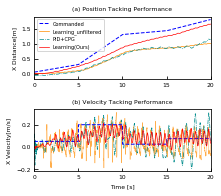

In [32]:

#plt.subplots(figsize=(8,3))
#plt.figure(figsize=(12,4))
fig, ax = plt.subplots(2,1, figsize = (12,4)) 

linewidth = 0.7

ax[0].plot(t, pos_f, '--', color='blue', label = 'Commanded' , linewidth= 1)
ax[0].plot(t, pos2 , color= 'darkorange',   label = 'Learning_unfiltered', linewidth=linewidth)
ax[0].plot(t, pos3, '-.', color = 'darkcyan',     label = 'PID+CPG', linewidth= linewidth)
ax[0].plot(t, pos1 , 'r',  label = 'Learning(Ours)', linewidth= linewidth)

 

ax[1].plot(t, vel2 , color= 'darkorange',   label = 'Learning_unfiltered', linewidth=0.5, alpha=linewidth)
ax[1].plot(t, vel3, '-.', color = 'darkcyan',     label = 'PID+CPG', linewidth=linewidth)
ax[1].plot(t, vel_f, '--', color='blue', label = 'Commanded' , linewidth=1)
ax[1].plot(t, vel1 , 'r',  label = 'Learning(Ours)', linewidth=linewidth)


# 字体设置
font1 = {'family' : 'DejaVu Sans',
'weight' : 'normal',
'size'   : 6,
}
 
# lavel 设置
#ax[0].set_xlabel('Time [s]', font1)
ax[0].set_ylabel('X Distance[m]', font1)
ax[0].set_title('(a) Position Tacking Performance', font1)
    
ax[0].legend(loc=0, prop={'size': 5})

# lavel 设置
ax[1].set_xlabel('Time [s]', font1)
ax[1].set_ylabel('X Velocity[m/s]', font1)
ax[1].set_title('(b) Velocity Tacking Performance', font1)
 
ax[0].set_xlim([0,20])
ax[1].set_xlim([0,20]) 


# 坐标轴设置
ax[0].set_xticks(np.arange(0 ,22, 5)) 
ax[0].tick_params(labelsize=6)
ax[1].set_xticks(np.arange(0 ,22, 5)) 
ax[1].tick_params(labelsize=6) 

fig.set_size_inches(8.3/2.54   ,8.3/2.54*0.9)
fig.subplots_adjust(left= 0.15,  bottom = 0.15, hspace=0.5 )
 

#plt.savefig(save_fig_path+'/compare_tracking_pos.eps')
plt.savefig(save_fig_path+'/compare_tracking_pos-vel-all.pdf', dpi=600,  pad_inches=0 )
plt.show()


<Figure size 432x288 with 0 Axes>

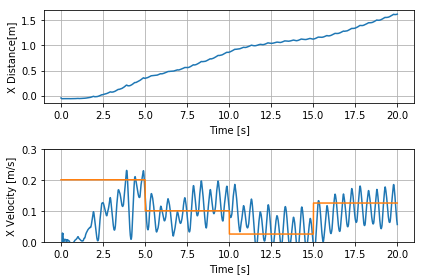

In [21]:

plt.figure()
 
t = np.arange(0, max_step * dt, dt)
 

pos = xyz[:max_step, 0]
vel = v_e[:max_step, 0]
vel_f = c_command[:max_step, 0]

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, pos)
#axs[0].set_ylim(0, 2)
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('X Distance[m]')
axs[0].grid(True)


axs[1].plot(t, vel,  label = 'v')
axs[1].plot(t, vel_f,  label = 'ref')
axs[1].set_ylim(0,0.3)
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('X Velocity [m/s]')
axs[1].grid(True)



fig.tight_layout()
plt.show()

In [79]:
com  = pd.read_csv('eval/com_s1.csv')
command =np.array(com)
command.shape

(2000, 3)

In [82]:
IO('data/cmd_s1.pkl').to_pickle(command)


In [8]:
import numpy as np
import matplotlib as mpl
mpl.use('pdf')
import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans',
#                                'Lucida Grande', 'Verdana']
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
# plt.rc('text', usetex=True)
# plt.rcParams['text.latex.preamble'] = [
#     r'\usepackage{tgheros}',    # helvetica font
#     r'\usepackage{sansmath}',   # math-font matching  helvetica
#     r'\sansmath'                # actually tell tex to use it!
#     r'\usepackage{siunitx}',    # micro symbols
#     r'\sisetup{detect-all}',    # force siunitx to use the fonts
# ]  
#plt.rc('font', family='serif', serif='DejaVu Sans')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

# width as measured in inkscape
width = 3.487
height = width / 1.618

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

x = np.arange(0.0, 3*np.pi , 0.1)
plt.plot(x, np.sin(x))

ax.set_ylabel('Some Metric (in unit)')
ax.set_xlabel('Something (in unit)')
ax.set_xlim(0, 3*np.pi)

fig.set_size_inches(width, height)
fig.savefig(save_fig_path +'/plot2.pdf')

/home/drl/anaconda3/envs/mujoco150/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/drl/anaconda3/envs/mujoco150/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/drl/anaconda3/envs/mujoco150/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/drl/anaconda3/envs/mujoco150/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/drl/anaconda3/envs/mujoco150/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/drl/anaconda3/envs/mujoco150/l

RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.16 (TeX Live 2015/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/drl/.cache/matplotlib/tex.cache/4e43429e162a24092bf20c1170459253.tex
LaTeX2e <2016/02/01>
Babel <3.9q> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texmf/tex/latex/tex-gyre/tgheros.sty
(/usr/share/texlive/texmf-dist/tex/latex/oberdiek/kvoptions.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ltxcmds.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/kvsetkeys.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/infwarerr.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/etexcmds.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifluatex.sty)))))
(/usr/share/texlive/texmf-dist/tex/latex/sansmath/sansmath.sty)

! LaTeX Error: File `siunitx.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.12 \sisetup
             {detect-all}^^M
No pages of output.
Transcript written on 4e43429e162a24092bf20c1170459253.log.




Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f0d444376a8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'$0$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.16 (TeX Live 2015/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/drl/.cache/matplotlib/tex.cache/5fa77e1828211028575be41753fb0fa9.tex
LaTeX2e <2016/02/01>
Babel <3.9q> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texmf/tex/latex/tex-gyre/tgheros.sty
(/usr/share/texlive/texmf-dist/tex/latex/oberdiek/kvoptions.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ltxcmds.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/kvsetkeys.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/infwarerr.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/etexcmds.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifluatex.sty)))))
(/usr/share/texlive/texmf-dist/tex/latex/sansmath/sansmath.sty)

! LaTeX Error: File `siunitx.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.12 \sisetup
             {detect-all}^^M
No pages of output.
Transcript written on 5fa77e1828211028575be41753fb0fa9.log.




RuntimeError: latex was not able to process the following string:
b'$0$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.16 (TeX Live 2015/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/drl/.cache/matplotlib/tex.cache/5fa77e1828211028575be41753fb0fa9.tex
LaTeX2e <2016/02/01>
Babel <3.9q> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texmf/tex/latex/tex-gyre/tgheros.sty
(/usr/share/texlive/texmf-dist/tex/latex/oberdiek/kvoptions.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ltxcmds.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/kvsetkeys.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/infwarerr.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/etexcmds.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifluatex.sty)))))
(/usr/share/texlive/texmf-dist/tex/latex/sansmath/sansmath.sty)

! LaTeX Error: File `siunitx.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.12 \sisetup
             {detect-all}^^M
No pages of output.
Transcript written on 5fa77e1828211028575be41753fb0fa9.log.




<Figure size 251.064x155.169 with 1 Axes>